In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('commute.csv')
df.head()

,Count,Daily commute to University? - Pre Covid 19,Daily commute to University? - Post Covid 19,Access to Technology
0,1,less than 30 min,less than 30 min,Use my own devices.
1,2,less than 30 min,less than 30 min,Use my own devices.
2,3,less than 30 min,less than 30 min,Use my own devices.
3,4,less than 30 min,1-2 hours,Borrowed devices from University
4,5,less than 30 min,1-2 hours,Use my own devices.


In [78]:
size_pre = df.groupby(['Daily commute to University? - Pre Covid 19'], as_index=False).size()
size_pre.rename(columns={'Daily commute to University? - Pre Covid 19': 'Daily commute', 'size': 'Pre'}, inplace=True)
size_post = df.groupby(['Daily commute to University? - Post Covid 19'], as_index=False).size()
size_post.rename(columns={'Daily commute to University? - Post Covid 19': 'Daily commute', 'size': 'Post'}, inplace=True)

In [79]:
df_mer = pd.merge(size_pre, size_post, on='Daily commute')
del df_mer['Post']

In [80]:
a = ['Pre','Pre','Pre']
df_mer['Time'] = a
df_mer.loc[3] = ['1-2 hours',14,'Post']
df_mer.loc[4] = ['30-60 min',16,'Post']
df_mer.loc[5] = ['less than 30 min',13,'Post']
df_mer.rename(columns={"Pre": "Count",'Time':'COVID Time'}, inplace=True)
df_mer

,Daily commute,Count,COVID Time
0,1-2 hours,8,Pre
1,30-60 min,18,Pre
2,less than 30 min,17,Pre
3,1-2 hours,14,Post
4,30-60 min,16,Post
5,less than 30 min,13,Post


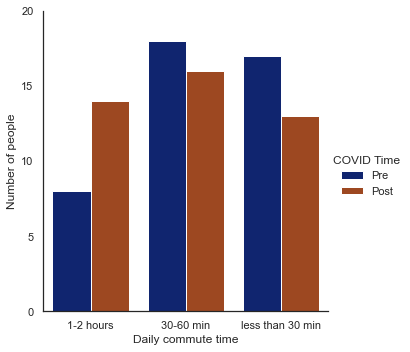

In [87]:
sns.catplot(data=df_mer, kind="bar", x="Daily commute", y="Count", hue="COVID Time", palette="dark", height=5)
plt.xlabel('Daily commute time')
plt.ylabel('Number of people')
plt.yticks([0,5,10,15,20])
plt.show()

In [184]:
df1= pd.read_csv('New COVID-19 Survey Student Responses.csv')
df1 = df1.fillna(0)
df1.head()

,Hours,Time spent on self study,Time spent on fitness,Time spent on sleep
0,0 - 1,85,485.0,0.0
1,1 - 2,188,550.0,0.0
2,2 - 3,354,120.0,0.0
3,3 - 4,205,25.0,0.0
4,4 - 5,152,1.0,5.0


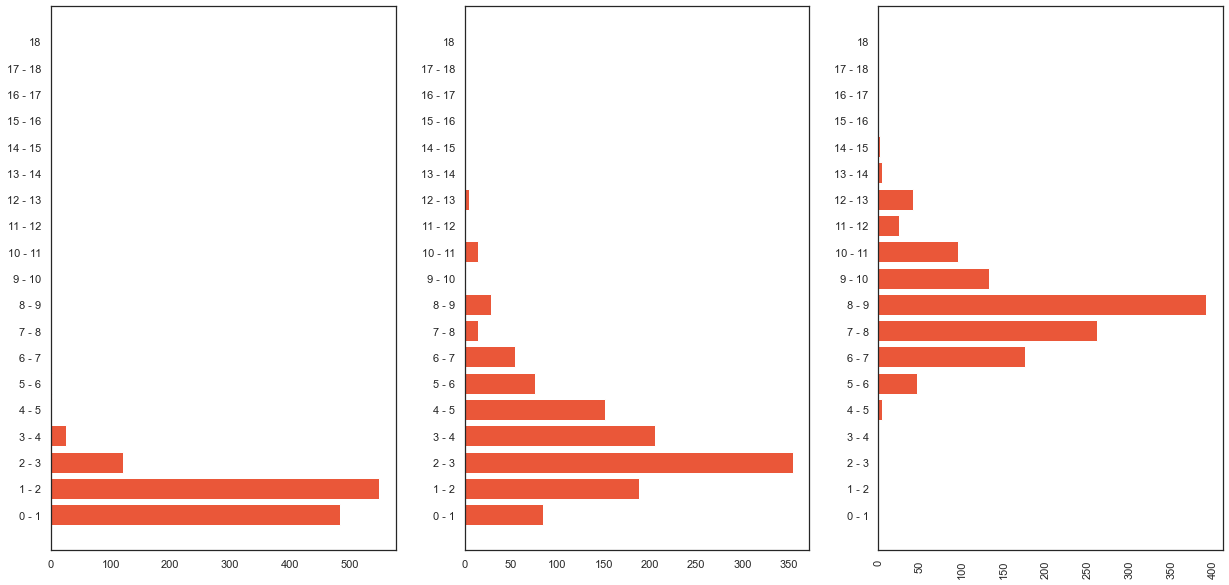

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.barh(df1['Hours'],df1['Time spent on fitness'])
ax2.barh(df1['Hours'],df1['Time spent on self study'])
ax3.barh(df1['Hours'],df1['Time spent on sleep'])
plt.gcf().set_size_inches(21, 10)
plt.xticks(rotation=90)
#plt.invert_yaxis()
#plt.tight_layout()
plt.show()

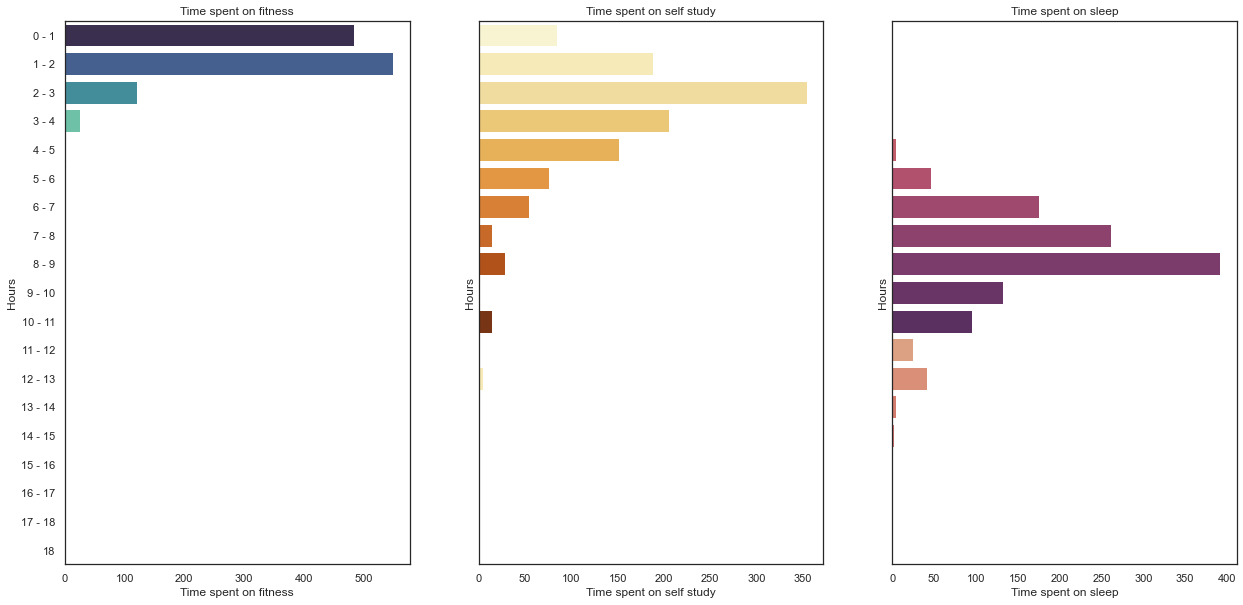

In [202]:
n1_plots = 4
palette_1 = sns.color_palette("mako", n_colors=n1_plots)
n2_plots = 11
palette_2 = sns.color_palette("YlOrBr", n_colors=n2_plots)
n3_plots = 11
palette_3 = sns.color_palette("flare", n_colors=n3_plots)
fig, axes = plt.subplots(1, 3,sharey=True)
sns.barplot(ax=axes[0],x="Time spent on fitness", y="Hours", data=df1,palette=palette_1)
sns.barplot(ax=axes[1],x="Time spent on self study", y="Hours", data=df1,palette=palette_2)
sns.barplot(ax=axes[2],x="Time spent on sleep", y="Hours", data=df1,palette=palette_3)
axes[0].set_title('Time spent on fitness')
axes[1].set_title('Time spent on self study')
axes[2].set_title('Time spent on sleep')

plt.gcf().set_size_inches(21, 10)

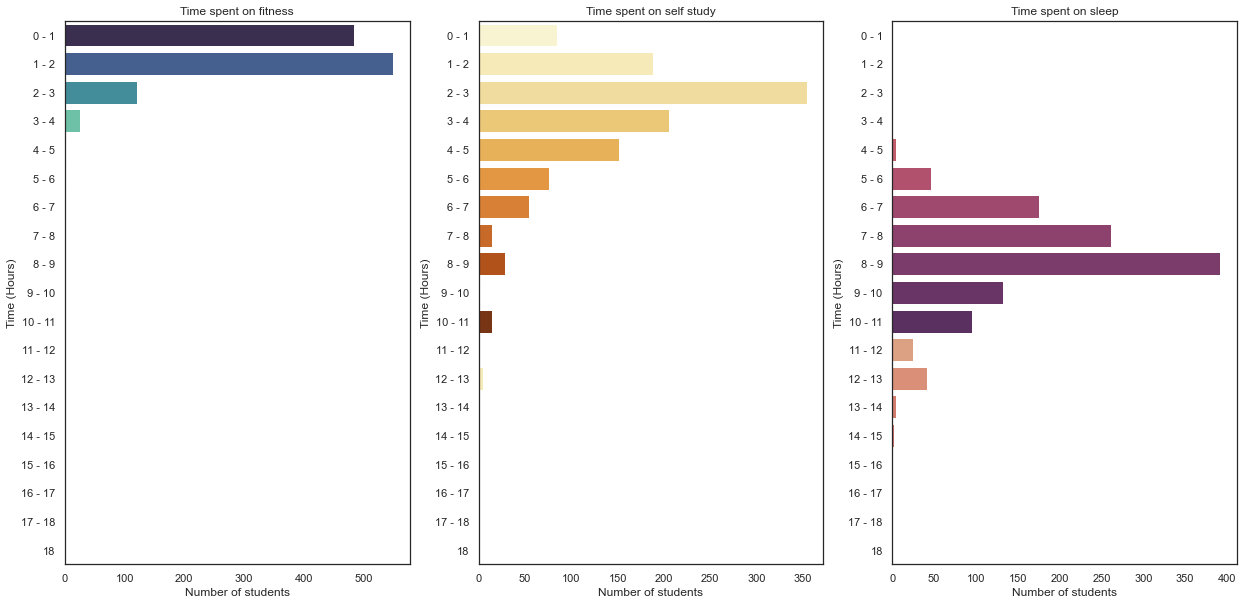

In [208]:
n1_plots = 4
palette_1 = sns.color_palette("mako", n_colors=n1_plots)
n2_plots = 11
palette_2 = sns.color_palette("YlOrBr", n_colors=n2_plots)
n3_plots = 11
palette_3 = sns.color_palette("flare", n_colors=n3_plots)
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)#sharey=True)
sns.barplot(ax=ax1,x="Time spent on fitness", y="Hours", data=df1,palette=palette_1)
sns.barplot(ax=ax2,x="Time spent on self study", y="Hours", data=df1,palette=palette_2)
sns.barplot(ax=ax3,x="Time spent on sleep", y="Hours", data=df1,palette=palette_3)
ax1.set_title('Time spent on fitness')
ax2.set_title('Time spent on self study')
ax3.set_title('Time spent on sleep')
ax1.set_xlabel('Number of students')
ax2.set_xlabel('Number of students')
ax3.set_xlabel('Number of students')
ax1.set_ylabel('Time (Hours)')
ax2.set_ylabel('Time (Hours)')
ax3.set_ylabel('Time (Hours)')

plt.gcf().set_size_inches(21, 10)

In [27]:
df = pd.read_csv('sleep.csv')
df.at[31,'Hours of sleep a day? - Pre Covid 19:Right']='4-5'
df.at[31,'Hours of sleep a day? - Post Covid 19:Right']='8-9'
df.at[29,'Hours of sleep a day? - Pre Covid 19:Right']='4-5'
df.head()

,Hours of sleep a day? - Pre Covid 19:Right,Hours of sleep a day? - Post Covid 19:Right
0,8-9,8-9
1,6-7,8-9
2,4-5,less than 4 hours
3,4-5,8-9
4,6-7,8-9


In [33]:
sleep_pre = df.groupby(['Hours of sleep a day? - Pre Covid 19:Right'], as_index=False).size()
sleep_pre.rename(columns={'Hours of sleep a day? - Pre Covid 19:Right': 'Hours of sleep', 'size': 'Count'}, inplace=True)
sleep_post = df.groupby(['Hours of sleep a day? - Post Covid 19:Right'], as_index=False).size()
sleep_post.rename(columns={'Hours of sleep a day? - Post Covid 19:Right': 'Hours of sleep', 'size': 'Count'}, inplace=True)

In [34]:
sleep_pre

,Hours of sleep,Count
0,4-5,6
1,6-7,28
2,8-9,8
3,less than 4 hours,1


In [35]:
sleep_post

,Hours of sleep,Count
0,10-12,1
1,4-5,2
2,6-7,8
3,8-9,30
4,less than 4 hours,2


In [39]:
sleep_comb = pd.concat([sleep_pre, sleep_post])
a = ['Pre','Pre','Pre','Pre','Post','Post','Post','Post','Post']
sleep_comb['Time'] = a
sleep_comb

,Hours of sleep,Count,Time
0,4-5,6,Pre
1,6-7,28,Pre
2,8-9,8,Pre
3,less than 4 hours,1,Pre
0,10-12,1,Post
1,4-5,2,Post
2,6-7,8,Post
3,8-9,30,Post
4,less than 4 hours,2,Post


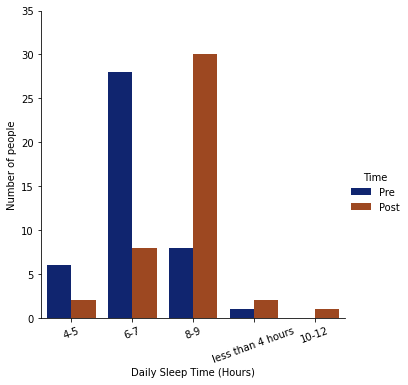

In [49]:
sns.catplot(data=sleep_comb, kind="bar", x="Hours of sleep", y="Count", hue="Time", palette="dark", height=5)
plt.xlabel('Daily Sleep Time (Hours)')
plt.ylabel('Number of people')
plt.yticks([0,5,10,15,20,25,30,35])
plt.xticks(rotation=20)
plt.show()

In [52]:
df = pd.read_csv('selfcare.csv')
df.head()

,Count,Hours of self-care a day? ( Pre Covid 19),Hours of self-care a day? ( Post Covid 19)
0,1,less than1hour,less than1hour
1,2,none,2
2,3,2,none
3,4,none,2
4,5,less than1hour,2


In [54]:
self_pre = df.groupby(['Hours of self-care a day? ( Pre Covid 19)'], as_index=False).size()
self_pre.rename(columns={'Hours of self-care a day? ( Pre Covid 19)': 'Hours of self_care', 'size': 'Count'}, inplace=True)
self_post = df.groupby(['Hours of self-care a day? ( Post Covid 19)'], as_index=False).size()
self_post.rename(columns={'Hours of self-care a day? ( Post Covid 19)': 'Hours of self_care', 'size': 'Count'}, inplace=True)

In [55]:
self_pre

,Hours of self_care,Count
0,2,14
1,less than1hour,18
2,more than 2,3
3,none,7


In [56]:
self_post

,Hours of self_care,Count
0,2,20
1,less than1hour,15
2,more than 2,5
3,none,2


In [57]:
self_comb = pd.concat([self_pre, self_post])
a = ['Pre','Pre','Pre','Pre','Post','Post','Post','Post']
self_comb['Time'] = a
self_comb

,Hours of self_care,Count,Time
0,2,14,Pre
1,less than1hour,18,Pre
2,more than 2,3,Pre
3,none,7,Pre
0,2,20,Post
1,less than1hour,15,Post
2,more than 2,5,Post
3,none,2,Post


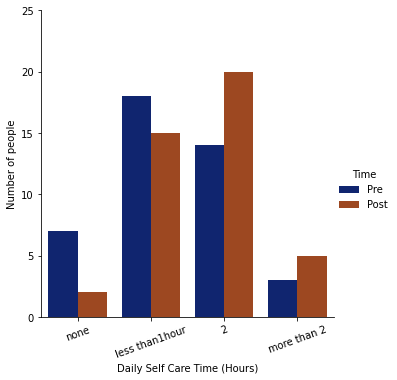

In [63]:
sort = ['none','less than1hour','2','more than 2']
sns.catplot(data=self_comb, kind="bar", x="Hours of self_care", y="Count", hue="Time", palette="dark", height=5, order=sort)
plt.xlabel('Daily Self Care Time (Hours)')
plt.ylabel('Number of people')
plt.yticks([0,5,10,15,20,25])
plt.xticks(rotation=20)
plt.show()